In [ ]:
pip install scikit-learn==1.4.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
mpl.style.use('ggplot')
from scipy.special import boxcox1p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings("ignore")

LOAD THE DATASET

In [ ]:
car=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/updated_file (3).csv')

In [ ]:
car.head()

,Ad Ref,Make,Model,Variant,Price,Year,Mileage,Fuel Type,Transmission,Registered In,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,8392474.0,Honda,City,Aspire 1.3 i-VTEC,3300000.0,2017.0,69000.0,Petrol,Manual,Karachi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8392468.0,Honda,Vezel,Hybrid RS Honda Sensing,7700000.0,2018.0,70250.0,Petrol,Automatic,Un-Registered,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8392409.0,Honda,City,1.2L M/T,4330000.0,2022.0,22000.0,Petrol,Manual,Punjab,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8383482.0,Honda,BR-V,i-VTEC S,5700000.0,2020.0,30865.0,Petrol,Automatic,Islamabad,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8330324.0,Honda,Civic,Oriel 1.8 i-VTEC CVT,5550000.0,2018.0,5331.0,Petrol,Automatic,Karachi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
car.shape

(1048575, 38)

In [ ]:
car = car.dropna(how='all')
unnamed_columns = [col for col in car.columns if 'Unnamed' in str(col)]
car = car.drop(columns=unnamed_columns)
print(car.shape)

(53363, 14)


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53363 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad Ref           53362 non-null  float64
 1   Make             53362 non-null  object 
 2   Model            53362 non-null  object 
 3   Variant          47553 non-null  object 
 4   Price            53362 non-null  float64
 5   Year             53362 non-null  float64
 6   Mileage          53363 non-null  float64
 7   Fuel Type        53362 non-null  object 
 8   Transmission     53362 non-null  object 
 9   Registered In    53362 non-null  object 
 10  Color            53360 non-null  object 
 11  Assembly         53362 non-null  object 
 12  Engine Capacity  53361 non-null  object 
 13  Body Type        46609 non-null  object 
dtypes: float64(4), object(10)
memory usage: 6.1+ MB


DATA PREPROCESSING - 1

In [ ]:
car['Year'] = pd.to_numeric(car['Year'], errors='coerce')
car = car.dropna(subset=['Year'])

In [ ]:
car['Year']=car['Year'].astype(int)

In [ ]:
car['Price']=car['Price'].astype(int)

In [ ]:
car['Mileage']=car['Mileage'].astype(int)

In [ ]:
if 'Variant' in car.columns:
    car['Variant'] = car['Variant'].str.replace(r'\b\d{4}\b', '', regex=True).str.strip()
    print(car['Variant'])
else:
    print("Column 'Variant' not found in the DataFrame.")

0              Aspire 1.3 i-VTEC
1        Hybrid RS Honda Sensing
2                       1.2L M/T
3                       i-VTEC S
4           Oriel 1.8 i-VTEC CVT
                  ...           
53357                   2.0T AWD
53358                        Top
53359                        HEV
53360                   2.0T AWD
53361                        NaN
Name: Variant, Length: 53362, dtype: object


In [ ]:
car.head()

,Ad Ref,Make,Model,Variant,Price,Year,Mileage,Fuel Type,Transmission,Registered In,Color,Assembly,Engine Capacity,Body Type
0,8392474.0,Honda,City,Aspire 1.3 i-VTEC,3300000,2017,69000,Petrol,Manual,Karachi,Bronze,Local,1300,Sedan
1,8392468.0,Honda,Vezel,Hybrid RS Honda Sensing,7700000,2018,70250,Petrol,Automatic,Un-Registered,Black Metallic,Imported,1500,Crossover
2,8392409.0,Honda,City,1.2L M/T,4330000,2022,22000,Petrol,Manual,Punjab,Taffeta White,Local,1200,Compact sedan
3,8383482.0,Honda,BR-V,i-VTEC S,5700000,2020,30865,Petrol,Automatic,Islamabad,Lunar Silver Metallic,Local,1500,MPV
4,8330324.0,Honda,Civic,Oriel 1.8 i-VTEC CVT,5550000,2018,5331,Petrol,Automatic,Karachi,Lunar Silver Metallic,Local,1800,Sedan


In [ ]:
car.nunique()

Ad Ref             53362
Make                  59
Model                405
Variant             1194
Price               2065
Year                  69
Mileage             7582
Fuel Type              6
Transmission           2
Registered In        103
Color                739
Assembly               2
Engine Capacity      207
Body Type             21
dtype: int64

In [ ]:
car.dropna(inplace=True)

In [ ]:
car.drop(columns='Ad Ref', inplace=True)

In [ ]:
car.drop(columns='Body Type', inplace=True)

In [ ]:
car.duplicated().sum()

229

In [ ]:
car=car.drop_duplicates()

In [ ]:
car.duplicated().sum()

0

In [ ]:
car.shape

(46367, 12)

In [ ]:
car.head()

,Make,Model,Variant,Price,Year,Mileage,Fuel Type,Transmission,Registered In,Color,Assembly,Engine Capacity
0,Honda,City,Aspire 1.3 i-VTEC,3300000,2017,69000,Petrol,Manual,Karachi,Bronze,Local,1300
1,Honda,Vezel,Hybrid RS Honda Sensing,7700000,2018,70250,Petrol,Automatic,Un-Registered,Black Metallic,Imported,1500
2,Honda,City,1.2L M/T,4330000,2022,22000,Petrol,Manual,Punjab,Taffeta White,Local,1200
3,Honda,BR-V,i-VTEC S,5700000,2020,30865,Petrol,Automatic,Islamabad,Lunar Silver Metallic,Local,1500
4,Honda,Civic,Oriel 1.8 i-VTEC CVT,5550000,2018,5331,Petrol,Automatic,Karachi,Lunar Silver Metallic,Local,1800


In [ ]:
import pandas as pd

car['Engine Capacity'] = car['Engine Capacity'].str.extract('(\d+)', expand=False)

car['Engine Capacity'] = car['Engine Capacity'].astype(float)

car = car.dropna(subset=['Engine Capacity'])

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46367 entries, 0 to 53360
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             46367 non-null  object 
 1   Model            46367 non-null  object 
 2   Variant          46367 non-null  object 
 3   Price            46367 non-null  int64  
 4   Year             46367 non-null  int64  
 5   Mileage          46367 non-null  int64  
 6   Fuel Type        46367 non-null  object 
 7   Transmission     46367 non-null  object 
 8   Registered In    46367 non-null  object 
 9   Color            46367 non-null  object 
 10  Assembly         46367 non-null  object 
 11  Engine Capacity  46367 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [ ]:
car.to_csv('cleaned_data.csv', index=False)

EXPLORATORY DATA ANALYSIS

In [ ]:
cat_cols= ['Assembly', 'Transmission', 'Fuel Type']

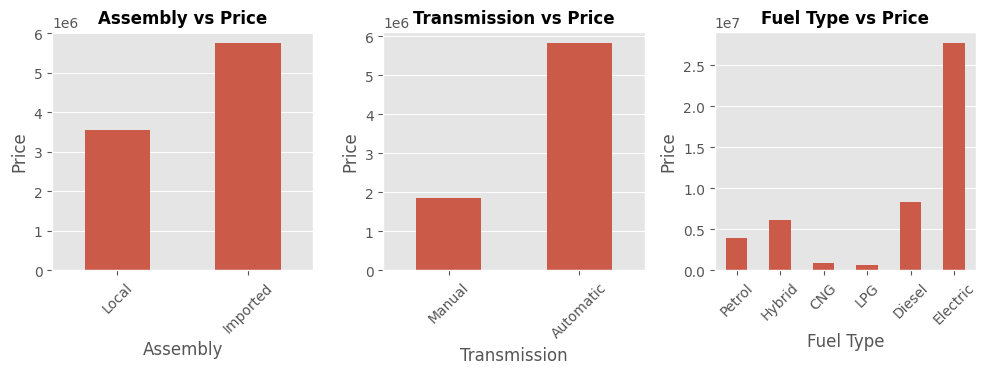

In [ ]:
plt.figure(figsize=(10,4))

for i, cols in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.barplot(data=car, x=cols, y="Price", ci=None, width=0.5)
    plt.xticks(rotation=45)
    plt.title(f"{cols} vs Price", fontweight="black", size=12)

plt.tight_layout()
plt.show()

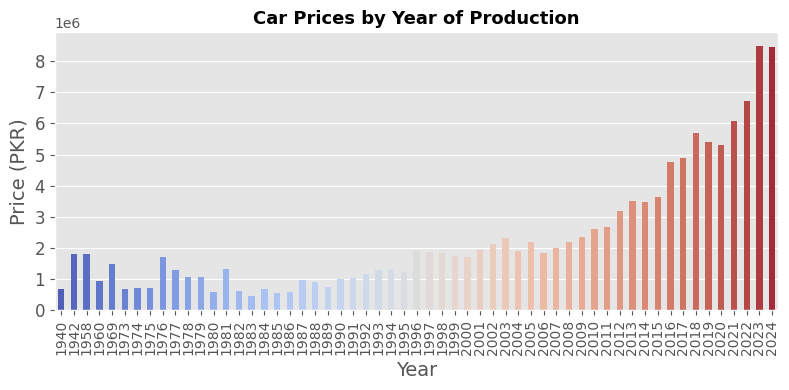

In [ ]:
plt.figure(figsize=(8, 4))

sns.barplot(x='Year', y='Price', data=car, palette="coolwarm", ci=None, width=0.5)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Car Prices by Year of Production', fontsize=13, fontweight="black")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

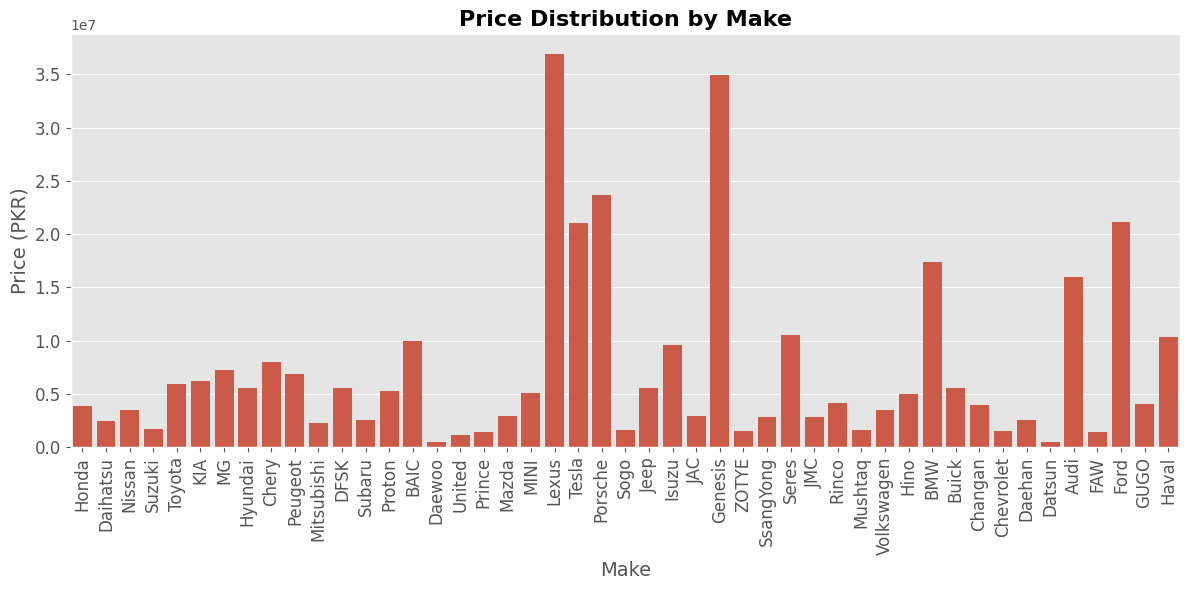

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(x='Make', y='Price', data=car, ci=None)

plt.xlabel('Make', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)

plt.title('Price Distribution by Make', fontweight="black", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

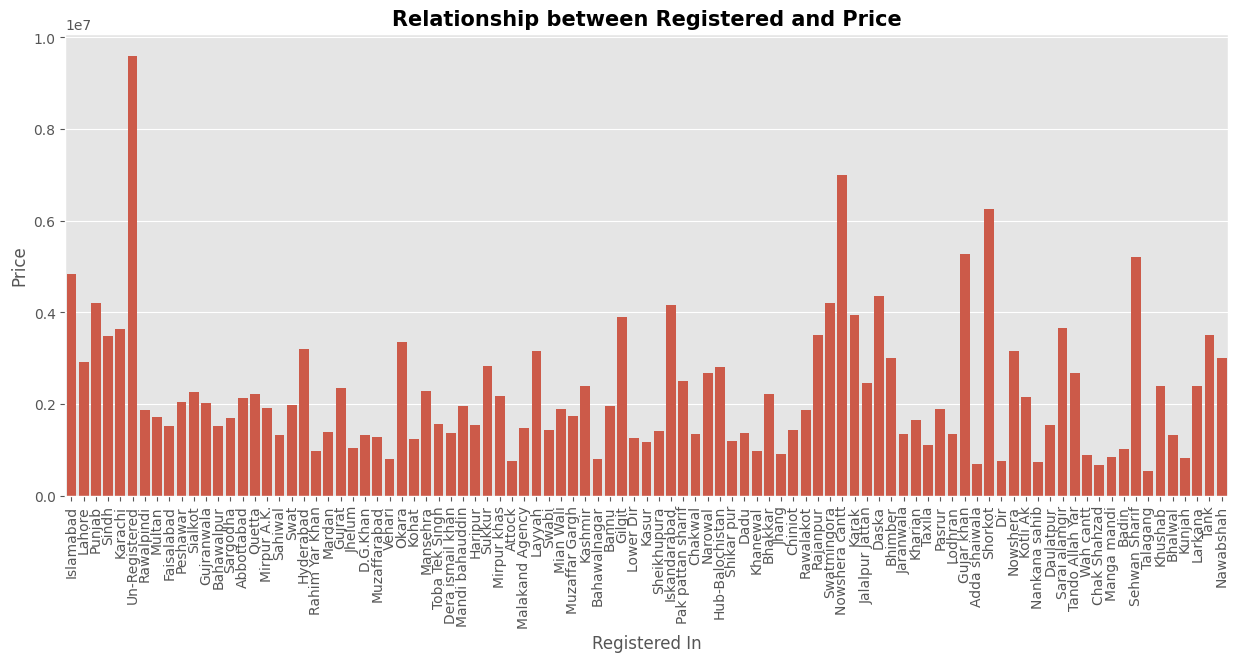

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Registered In", y="Price", data=car, order=car["Registered In"].value_counts().index, ci=None)
plt.xlabel("Registered In")
plt.ylabel("Price")
plt.title("Relationship between Registered and Price", fontweight="black", size=15)
plt.xticks(rotation=90)
plt.show()

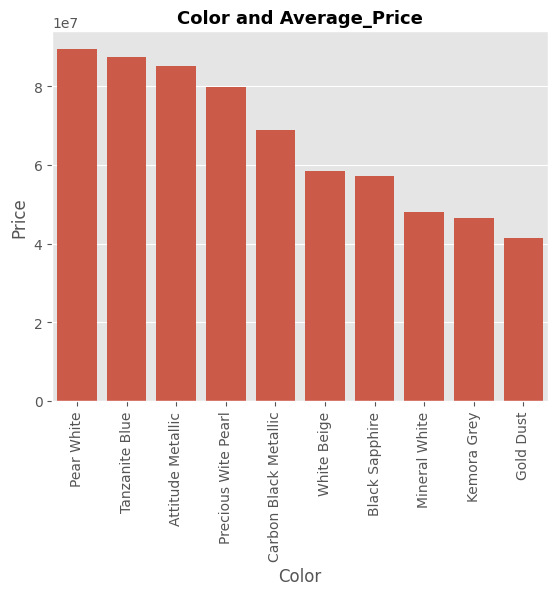

In [ ]:
average_color = car.groupby("Color")["Price"].mean().reset_index().sort_values(ascending=False, by="Price").head(10)

sns.barplot(x="Color", y="Price", data=average_color)
plt.title("Color and Average_Price", fontweight="black", size=13)
plt.xticks(rotation=90)
plt.show()

DATA PREPROCESSING - 2

In [ ]:
X= car.drop(columns="Price", axis=1)
y= car["Price"]

In [ ]:
X

,Make,Model,Variant,Year,Mileage,Fuel Type,Transmission,Registered In,Color,Assembly,Engine Capacity
0,Honda,City,Aspire 1.3 i-VTEC,2017,69000,Petrol,Manual,Karachi,Bronze,Local,1300.0
1,Honda,Vezel,Hybrid RS Honda Sensing,2018,70250,Petrol,Automatic,Un-Registered,Black Metallic,Imported,1500.0
2,Honda,City,1.2L M/T,2022,22000,Petrol,Manual,Punjab,Taffeta White,Local,1200.0
3,Honda,BR-V,i-VTEC S,2020,30865,Petrol,Automatic,Islamabad,Lunar Silver Metallic,Local,1500.0
4,Honda,Civic,Oriel 1.8 i-VTEC CVT,2018,5331,Petrol,Automatic,Karachi,Lunar Silver Metallic,Local,1800.0
...,...,...,...,...,...,...,...,...,...,...,...
53356,Haval,H6,1.5T,2023,6300,Petrol,Automatic,Islamabad,Diamond Black,Local,1500.0
53357,Haval,H6,2.0T AWD,2023,12000,Petrol,Automatic,Islamabad,White,Local,2000.0
53358,Haval,Jolion,Top,2021,30000,Petrol,Automatic,Punjab,Hamilton White,Imported,1500.0
53359,Haval,H6,HEV,2024,5,Hybrid,Automatic,Un-Registered,Black,Local,1500.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['Make', 'Model', 'Variant', 'Fuel Type', 'Transmission', 'Registered In', 'Color', 'Assembly', 'Engine Capacity']])

column_trans = make_column_transformer(
    (ohe, ['Make', 'Model', 'Variant', 'Fuel Type', 'Transmission', 'Registered In', 'Color', 'Assembly', 'Engine Capacity']),
    remainder='passthrough'
)

Splitting Data for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

In [ ]:
car.head()

,Make,Model,Variant,Price,Year,Mileage,Fuel Type,Transmission,Registered In,Color,Assembly,Engine Capacity
0,Honda,City,Aspire 1.3 i-VTEC,3300000,2017,69000,Petrol,Manual,Karachi,Bronze,Local,1300.0
1,Honda,Vezel,Hybrid RS Honda Sensing,7700000,2018,70250,Petrol,Automatic,Un-Registered,Black Metallic,Imported,1500.0
2,Honda,City,1.2L M/T,4330000,2022,22000,Petrol,Manual,Punjab,Taffeta White,Local,1200.0
3,Honda,BR-V,i-VTEC S,5700000,2020,30865,Petrol,Automatic,Islamabad,Lunar Silver Metallic,Local,1500.0
4,Honda,Civic,Oriel 1.8 i-VTEC CVT,5550000,2018,5331,Petrol,Automatic,Karachi,Lunar Silver Metallic,Local,1800.0


1. Creating Random Forest Model

Training R-squared Score: 0.9951845953871845
Testing R-squared Score: 0.9286697870661271


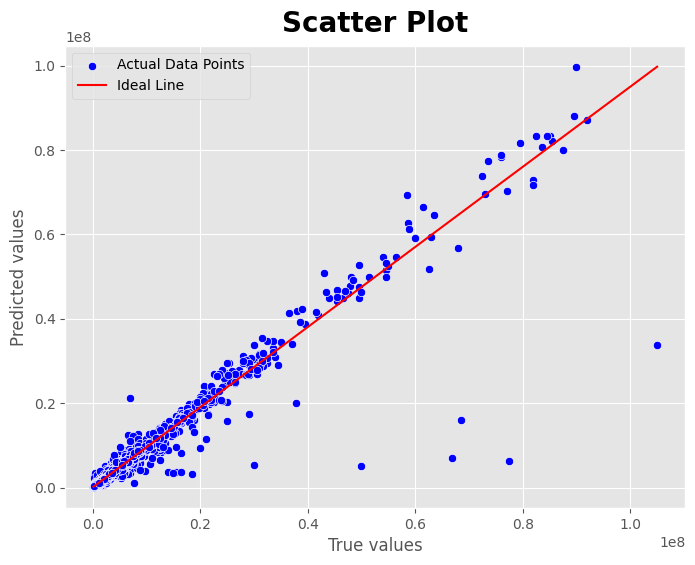

In [ ]:
rf = RandomForestRegressor()

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, rf)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_rf = r2_score(y_train, y_train_pred)
print("Training R-squared Score:", train_r2_rf)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_rf = r2_score(y_test, y_test_pred)
print("Testing R-squared Score:", test_r2_rf)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()


2. Creating Lasso Regression Model

Training R-squared Score (Lasso Regression): 0.9529031455345492
Testing R-squared Score (Lasso Regression): 0.9282581312028534


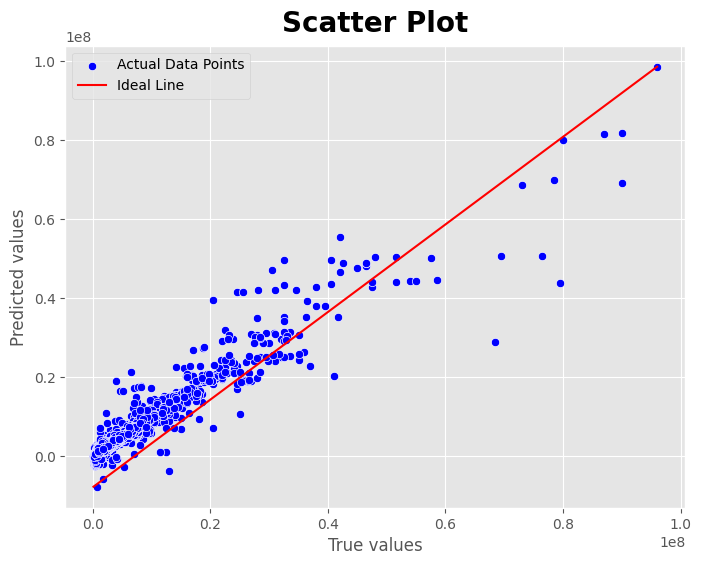

In [ ]:
# Initialize the Lasso Regression model
lasso = Lasso(alpha=0.1)

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, lasso)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_lasso = r2_score(y_train, y_train_pred)
print("Training R-squared Score (Lasso Regression):", train_r2_lasso)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_lasso = r2_score(y_test, y_test_pred)
print("Testing R-squared Score (Lasso Regression):", test_r2_lasso)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()

3. Creating Decision Tree Regression Model

Training R-squared Score: 0.9998940920054892
Testing R-squared Score: 0.9319483263943651


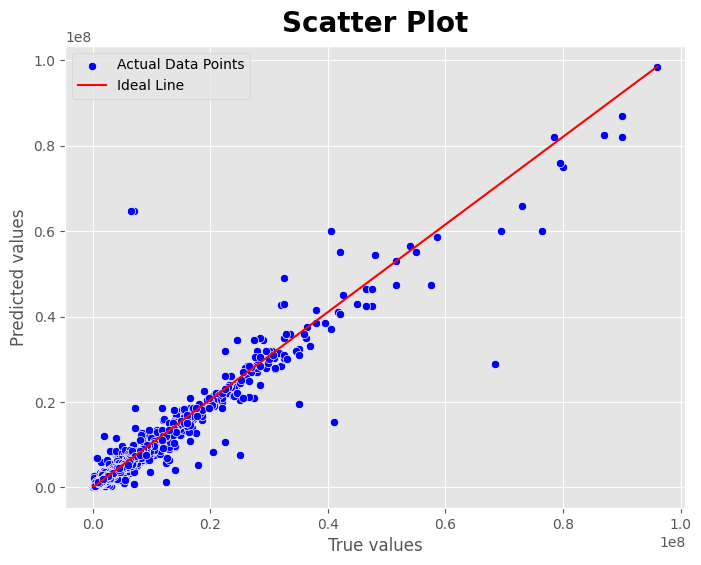

In [ ]:
# Initialize the DecisionTreeRegressor model
decision_tree = DecisionTreeRegressor()

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, decision_tree)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_decision_tree = r2_score(y_train, y_train_pred)
print("Training R-squared Score:", train_r2_decision_tree)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_decision_tree = r2_score(y_test, y_test_pred)
print("Testing R-squared Score:", test_r2_decision_tree)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()

4. Creating Gradient Boosting Regression Model

Training R-squared Score: 0.9447804610650274
Testing R-squared Score: 0.9212302427631576


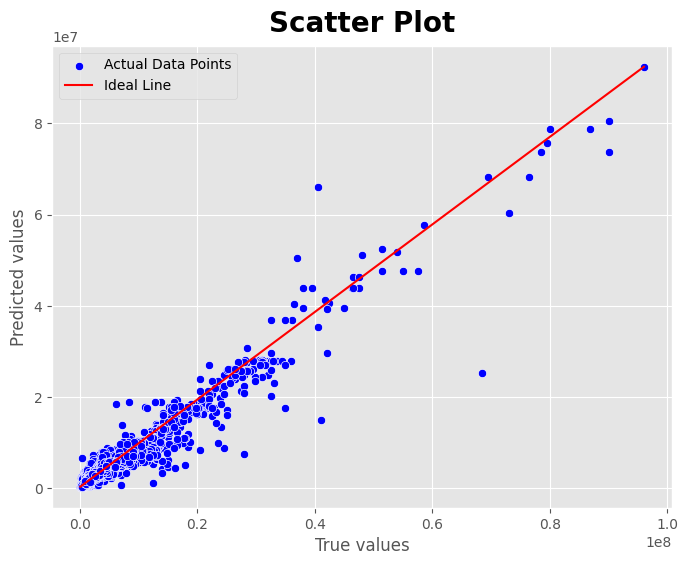

In [ ]:
# Initialize the GradientBoostingRegressor model
gradient_boost = GradientBoostingRegressor()

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, gradient_boost)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_gdbt = r2_score(y_train, y_train_pred)
print("Training R-squared Score:", train_r2_gdbt)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_gdbt = r2_score(y_test, y_test_pred)
print("Testing R-squared Score:", test_r2_gdbt)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()

5. Creating LGBM Regressor Model

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1453
[LightGBM] [Info] Number of data points in the train set: 37093, number of used features: 576
[LightGBM] [Info] Start training from score 4282332.272936
Training R-squared Score: 0.956447424839822
Testing R-squared Score: 0.9534437463303862


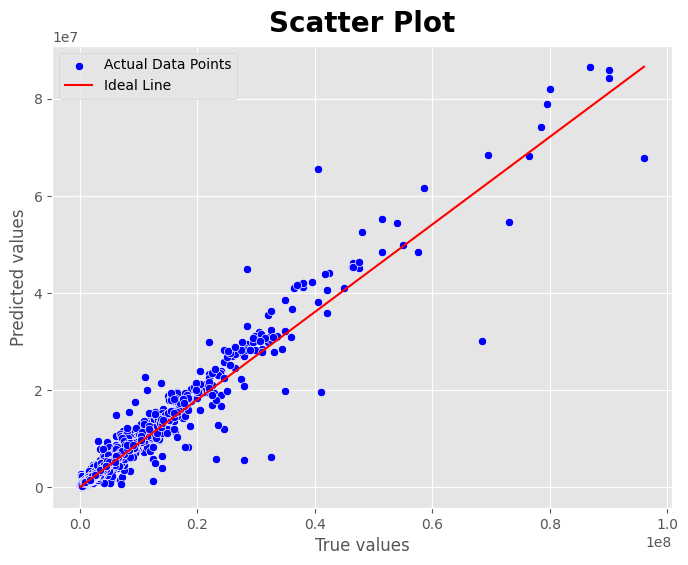

In [ ]:
# Initialize the LGBMRegressor model
lgbm = LGBMRegressor()

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, lgbm)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_lgbm = r2_score(y_train, y_train_pred)
print("Training R-squared Score:", train_r2_lgbm)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_lgbm = r2_score(y_test, y_test_pred)
print("Testing R-squared Score:", test_r2_lgbm)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()

6.Creating XGBRegressor Model

Training R-squared Score: 0.9864964563478887
Testing R-squared Score: 0.9708703181905202


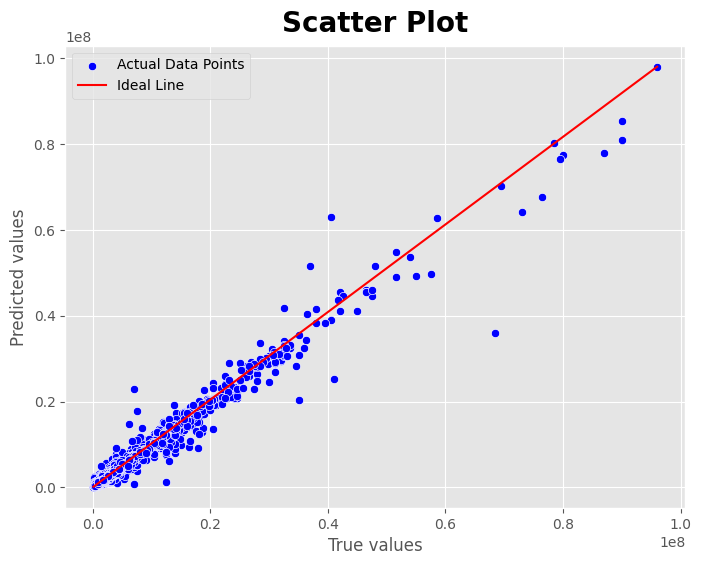

In [ ]:
# Initialize the XGBRegressor model
xgb = XGBRegressor()

# Create a pipeline with preprocessing and model
pipe = make_pipeline(column_trans, xgb)

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Predict on the training data
y_train_pred = pipe.predict(X_train)

# Calculate training R-squared score
train_r2_xgb = r2_score(y_train, y_train_pred)
print("Training R-squared Score:", train_r2_xgb)

# Predict on the testing data
y_test_pred = pipe.predict(X_test)

# Calculate testing R-squared score
test_r2_xgb = r2_score(y_test, y_test_pred)
print("Testing R-squared Score:", test_r2_xgb)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, color="blue", label='Actual Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], color="red", label="Ideal Line")
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend()
plt.title('Scatter Plot', fontweight="bold", size=20, pad=10)
plt.show()

In [ ]:
import pandas as pd

# Define the models and their corresponding scores
models = ["RandomForestRegressor", "lasso", "DecisionTreeRegressor", "GradientBoostingRegressor", "LGBMRegressor", "XGBRegressor"]
train_scores = [train_r2_rf, train_r2_lasso,train_r2_decision_tree, train_r2_gdbt, train_r2_lgbm, train_r2_xgb]
test_scores = [test_r2_rf, test_r2_lasso, test_r2_decision_tree, test_r2_gdbt, test_r2_lgbm, test_r2_xgb]

# Create a DataFrame to display the scores
scores_df = pd.DataFrame({'Model': models, 'Training Score': train_scores, 'Testing Score': test_scores})

# Display the DataFrame
print(scores_df)

                       Model  Training Score  Testing Score
0      RandomForestRegressor        0.993459       0.965171
1                      lasso        0.952903       0.928258
2      DecisionTreeRegressor        0.999894       0.931948
3  GradientBoostingRegressor        0.944780       0.921230
4              LGBMRegressor        0.956447       0.953444
5               XGBRegressor        0.986496       0.970870


In [ ]:
# Find the index of the model with the highest testing score
best_model_index = scores_df['Testing Score'].idxmax()

# Get the best model name
best_model_name = scores_df.loc[best_model_index, 'Model']

# Print the best model name
print("Best Model:", best_model_name)

Best Model: XGBRegressor


In [ ]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Toyota','Fortuner','Legender',2024
                                                                ,10000,'Diesel','Automatic','Karachi','Black','Local',2800]).reshape(1,11)))

array([17084576.], dtype=float32)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46367 entries, 0 to 53360
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Make             46367 non-null  object 
 1   Model            46367 non-null  object 
 2   Variant          46367 non-null  object 
 3   Price            46367 non-null  int64  
 4   Year             46367 non-null  int64  
 5   Mileage          46367 non-null  int64  
 6   Fuel Type        46367 non-null  object 
 7   Transmission     46367 non-null  object 
 8   Registered In    46367 non-null  object 
 9   Color            46367 non-null  object 
 10  Assembly         46367 non-null  object 
 11  Engine Capacity  46367 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [ ]:
import pickle

In [ ]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))